In [4]:
# Set autosave to 3 minutes
%autosave 180
# ipython magic
%pylab inline
# Import modules
import os
import datetime as dt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
#matplotlib.style.use('seaborn-paper')

Autosaving every 180 seconds
Populating the interactive namespace from numpy and matplotlib


In [6]:
# This is Frist step to import CSV file and Fix problem came with ascii code
Data_in_kickstarters = pd.read_csv("s.csv",encoding = "latin")

In [7]:
# Dim for data set and to check csv work good
Data_in_kickstarters.shape

(45957, 17)

In [8]:
# This step to display frist rows in data 
Data_in_kickstarters.head()

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [9]:
# This step to make name columns in upper case 
Data_in_kickstarters.columns = Data_in_kickstarters.columns.str.upper()
Data_in_kickstarters.columns

Index(['PROJECT ID', 'NAME', 'URL', 'CATEGORY', 'SUBCATEGORY', 'LOCATION',
       'STATUS', 'GOAL', 'PLEDGED', 'FUNDED PERCENTAGE', 'BACKERS',
       'FUNDED DATE', 'LEVELS', 'REWARD LEVELS', 'UPDATES', 'COMMENTS',
       'DURATION'],
      dtype='object')

In [10]:
# These step to rename the columns to avoid spaces in
Data_in_kickstarters1 = Data_in_kickstarters.rename(columns ={"REWARD LEVELS":"REWARD_LEVELS","FUNDED DATE":"FUNDED_DATE","PROJECT ID":"PROJECT_ID","FUNDED PERCENTAGE":"FUNDED_PERCENTAGE","FUNDED DAT":"FUNDED_DAT"})

In [43]:
# Data need to cleanzing and one common issues with dataset is a null inside file and use fun fillin to avoid nan
Data_in_kickstarters1.PLEDGED.isnull().sum()
fill_data_0 = Data_in_kickstarters1.PLEDGED.fillna(0)
print(fill_data_0)

0        11545.0
1           20.0
2           56.0
3         6535.0
4            0.0
5         3582.0
6          280.0
7         2180.0
8         1125.0
9         9836.0
10           0.0
11         145.0
12       20138.0
13          75.0
14         765.0
15         310.0
16           0.0
17          50.0
18        2925.0
19        3511.0
20         175.0
21         110.0
22        6860.0
23        5536.0
24         192.0
25        7030.0
26        8805.0
27        1505.0
28        6596.0
29        1502.0
          ...   
45927      446.0
45928      446.0
45929     5390.0
45930     5390.0
45931     1220.0
45932     1220.0
45933      250.0
45934      250.0
45935      843.0
45936      252.0
45937      255.0
45938     4400.0
45939      298.0
45940     2661.0
45941       52.0
45942    13151.0
45943    31166.0
45944     1516.0
45945     2390.0
45946        0.0
45947     1614.0
45948      884.0
45949     2400.0
45950    13494.0
45951      750.0
45952      601.0
45953       75.0
45954    10000

In [12]:
# To do some Statical culcalations with columns PLEDGED

Data_in_kickstarters1['PLEDGED'].describe()


count    4.594500e+04
mean     4.980750e+03
std      5.674162e+04
min      0.000000e+00
25%      1.960000e+02
50%      1.310000e+03
75%      4.165000e+03
max      1.026684e+07
Name: PLEDGED, dtype: float64

In [13]:
# Answer for Q.1
Data_in_kickstarters1['PLEDGED'].mean()
print(Data_in_kickstarters1['PLEDGED'].mean(),"$")

4980.749678963979 $


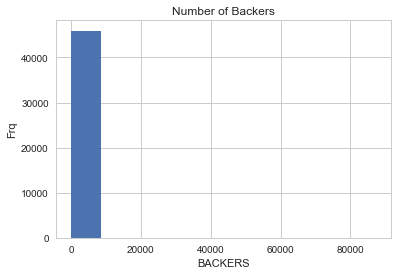

In [14]:
# Answer For Q.2 histogram that shows the distribution for number of backers
plt.hist(Data_in_kickstarters1['BACKERS'])
plt.xlabel("BACKERS")
plt.ylabel("Frq")
plt.title("Number of Backers")
plt.show()

In [15]:
# Answer For Q.2 Skewness

stats.describe(Data_in_kickstarters1['BACKERS'])

DescribeResult(nobs=45957, minmax=(0, 87142), mean=69.97319233196248, variance=474209.1818907858, skewness=87.47111920387329, kurtosis=9340.226136115718)

In [16]:
# Try to remove outliters

zzz = Data_in_kickstarters1

Remove_outliters = zzz[((zzz.BACKERS - zzz.BACKERS.mean()) / zzz.BACKERS.std()).abs() < .085]
Remove_outliters['BACKERS'].describe()

count    24979.000000
mean        46.829016
std         29.133568
min         12.000000
25%         23.000000
50%         39.000000
75%         65.000000
max        128.000000
Name: BACKERS, dtype: float64

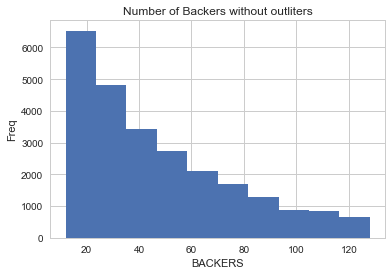

In [92]:
# Create Histogram that shows the distribution for number of backers

plt.hist(Remove_outliters["BACKERS"])
plt.xlabel("BACKERS")
plt.ylabel("Freq")
plt.title("Number of Backers without outliters")
plt.show()


/Users/mac/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # Remove the CWD from sys.path while we load stuff.


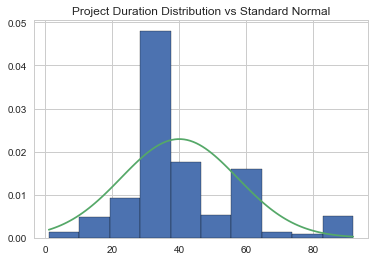

In [106]:
# Is the ‘duration’ variable normally distributed

plt.hist(x["DURATION"], edgecolor='black', normed=True)
plt.title("Project Duration Distribution vs Standard Normal")

# overlay normal curve

mean = float(np.mean(x["DURATION"]))
sd = float(np.std(x["DURATION"], ddof=1))
min_chng = float(np.min(x["DURATION"]))
max_chng = float(np.max(x["DURATION"]))
a = np.linspace(min_chng, max_chng,100) # Like range

plt.plot(a,mlab.normpdf(a,mean,sd))

In [24]:
# Map 'status' column into boolean and make new column
status_in_boolean = {'successful': True, 'failed': False, 'suspended': False, 'canceled':False}
Data_in_kickstarters1['status_in_boolean'] = Data_in_kickstarters1['STATUS'].map(status_in_boolean)

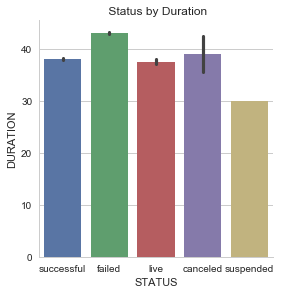

In [26]:
# Plot showing rates of success by duration What's the best length of time to run a campaign?- 

sns.factorplot(x='STATUS', y='DURATION', data=Data_in_kickstarters1, kind='bar')
plt.xlabel('STATUS')
plt.ylabel('DURATION')
plt.title(' Status by Duration')
plt.show()


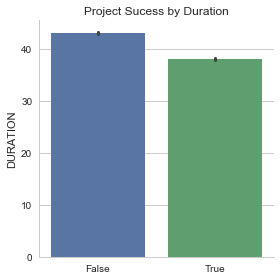

In [31]:
# Plot showing rates of success by duration What's the best length of time to run a campaign?- 
sns.factorplot(y='DURATION', x='status_in_boolean', data=Data_in_kickstarters1, kind='bar')
plt.xlabel('')
plt.ylabel('DURATION')
plt.title('Project Sucess by Duration')
plt.show()


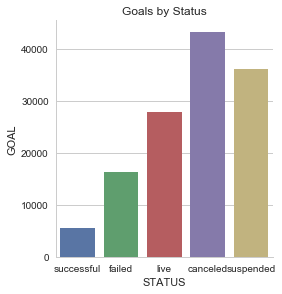

In [28]:
# Plot showing rates of success by duration 2.2: What's the ideal pledge goal?
sns.factorplot(x='STATUS', y='GOAL', data=Data_in_kickstarters1, kind='bar', ci=None)
plt.xlabel('STATUS')
plt.ylabel('GOAL')
plt.title('Goals by Status')
plt.show()

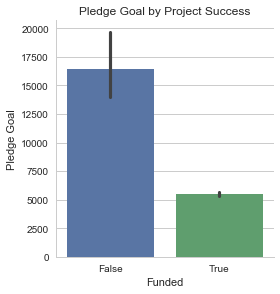

In [32]:
# Plot showing rates of success by duration  What's the ideal pledge goal?
sns.factorplot(x='status_in_boolean', y='GOAL', data=Data_in_kickstarters1, kind='bar')
plt.xlabel('Funded')
plt.ylabel('Pledge Goal')
plt.title('Pledge Goal by Project Success')
plt.show()


In [33]:
# Print categories
Data_in_kickstarters1['CATEGORY'].unique().tolist()

['Film & Video',
 'Games',
 'Fashion',
 'Music',
 'Art',
 'Technology',
 'Dance',
 'Publishing',
 'Theater',
 'Comics',
 'Design',
 'Photography',
 'Food',
 'Film &amp; Video']

In [34]:
# Replace bad data values in 'category' column
Data_in_kickstarters1['CATEGORY'] = Data_in_kickstarters1['CATEGORY'].replace(['Film &amp; Video'], 'Film & Video')
Data_in_kickstarters1['CATEGORY'].unique().tolist()

['Film & Video',
 'Games',
 'Fashion',
 'Music',
 'Art',
 'Technology',
 'Dance',
 'Publishing',
 'Theater',
 'Comics',
 'Design',
 'Photography',
 'Food']

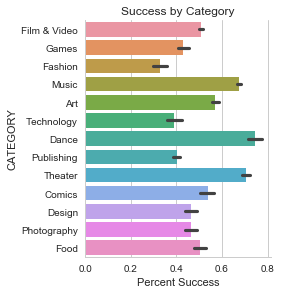

In [35]:
# Plot showing rates of success by duration
sns.factorplot(y='CATEGORY', x='status_in_boolean', data=Data_in_kickstarters1, kind='bar')
plt.xlabel('Percent Success')
plt.ylabel('CATEGORY')
plt.title('Success by Category')
plt.show()

In [37]:
# Create 'funded_month' column based on datetime conversion from 'funded_date' column

Data_in_kickstarters1['funded_month'] = Data_in_kickstarters1['FUNDED_DATE'].apply(lambda x: dt.datetime.strptime(x, '%a, %d %b %Y %X -%f').strftime('%B'))


# Create 'funded_weekday' column based on datetime conversion from 'funded_date' column

Data_in_kickstarters1['funded_weekday'] = Data_in_kickstarters1['FUNDED_DATE'].apply(lambda x: dt.datetime.strptime(x, '%a, %d %b %Y %X -%f').strftime('%a'))



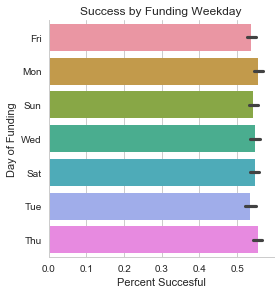

In [39]:
# Plot showing rates of success by weekday
sns.factorplot(y='funded_weekday', x='status_in_boolean', data=Data_in_kickstarters1, kind='bar')
plt.xlabel('Percent Succesful')
plt.ylabel('Day of Funding')
plt.title('Success by Funding Weekday')
plt.show()

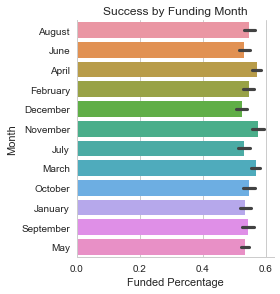

In [40]:
# Plot showing rates of success by MONTH
sns.factorplot(y='funded_month', x='status_in_boolean', data=Data_in_kickstarters1, kind='bar')
plt.xlabel('Funded Percentage')
plt.ylabel('Month')
plt.title('Success by Funding Month')
plt.show()